<a href="https://colab.research.google.com/github/Karantiwari307/Netflix-Movies-And-TV-Shows-Clustering/blob/main/capstone_project_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
# importing drivef
rom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# importing data from drive
df1=pd.read_csv("/content/drive/MyDrive/Almabetter projects/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
# creating copy of dataset
df=df1.copy()

In [ ]:
pd.set_option('display.max_columns', None)

**Exploring dataset**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# shape of dataset
df.shape

(7787, 12)

In [ ]:
# columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# basic information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**DATA CLEANING**

In [ ]:
# changing  object format into datetime format
df["date_added"]=pd.to_datetime(df["date_added"])

In [ ]:
# number od unique values in the columns
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1512
release_year      73
rating            14
duration         216
listed_in        492
description     7769
year_added        14
dtype: int64

In [ ]:
# unique values
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#  unique values
df.release_year.unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
# number of duplicates 
len(df[df.duplicated()])

0

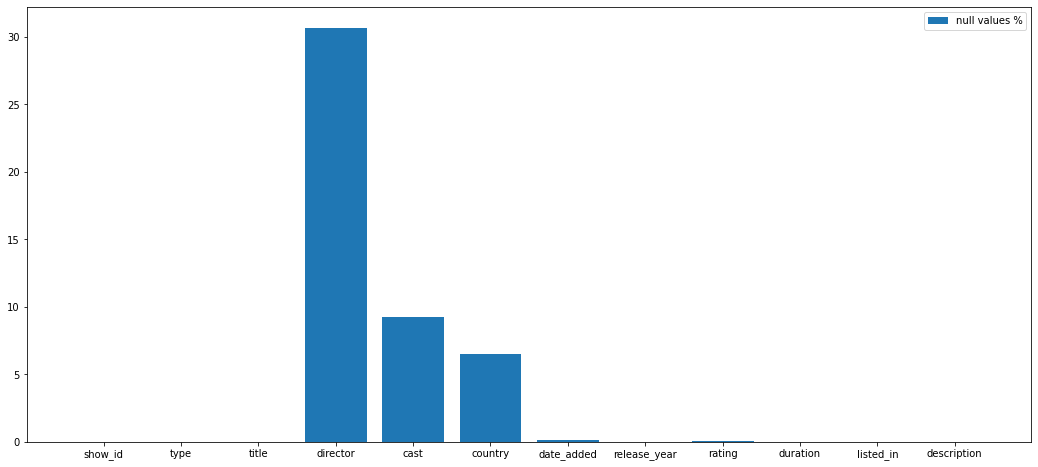

In [ ]:
# null values

percent_missing = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing',ascending=False)
plt.figure(figsize=(18,8))
plt.bar(missing_value_df["column_name"],missing_value_df["percent_missing"], label = "null values %")
plt.legend()


Director,cast,country,date_added and rating columns are having missing values around 31%,9%,7%,0.13% and 0.09% respectively

In [ ]:
# replacing null value 
df.fillna({"director":"unavailable",
           "cast":"unavailable",
           "country":"unavailable",
           },inplace=True)

In [ ]:
df[df["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,unavailable,"Oprah Winfrey, Ava DuVernay",unavailable,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,unavailable,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,unavailable,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
# droping null value
df.dropna(subset=["rating"],inplace=True)

In [ ]:
df[df["date_added"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,unavailable,Igor Dmitriev,unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
# droping null value
df.dropna(subset=["date_added"],inplace=True)

In [ ]:
# extracting year 
df["year_added"]=df["date_added"].dt.year

In [ ]:
# shape of data after cleaning  the data
df.shape

(7770, 13)

In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  year_added    7770 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 849.8+ KB


##**EDA**

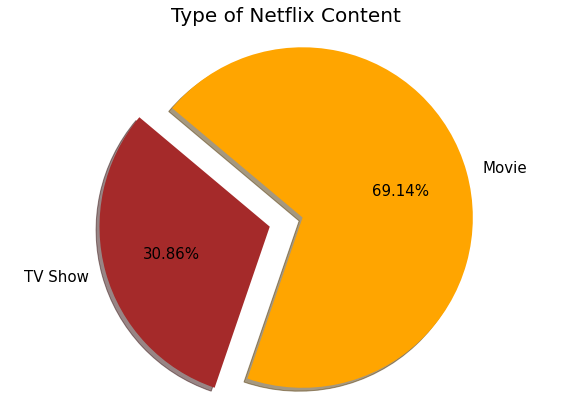

In [ ]:
#Checking the distribution of type of Content in the dataset
plt.figure(figsize=(10, 7))
labels=['TV Show', 'Movie']
textprops = {"fontsize":15}
plt.pie(df['type'].value_counts().sort_values(),labels=labels,autopct='%1.2f%%',explode=[0.1,0.1],
        colors=['brown','orange'], startangle=140, shadow = True, textprops=textprops)
plt.title('Type of Netflix Content',fontsize=20)
plt.axis('equal')
plt.show()

Netflix has around 69% movies and 31% TV shows.

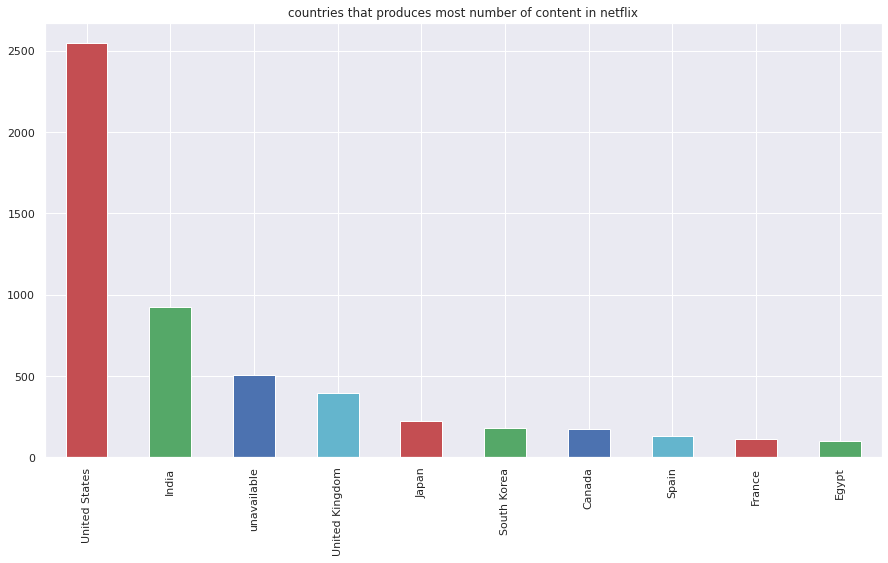

In [ ]:
# checking top 10 countries that produces most number of content in netflix
plt.figure(figsize=(15,8))
sns.set()
df.country.value_counts()[:10].plot( kind='bar', color=list('rgbc'))
plt.title("countries that produces most number of content in netflix")
plt.show()

USA ,India and The United kingdom are top three producers country in Netflix



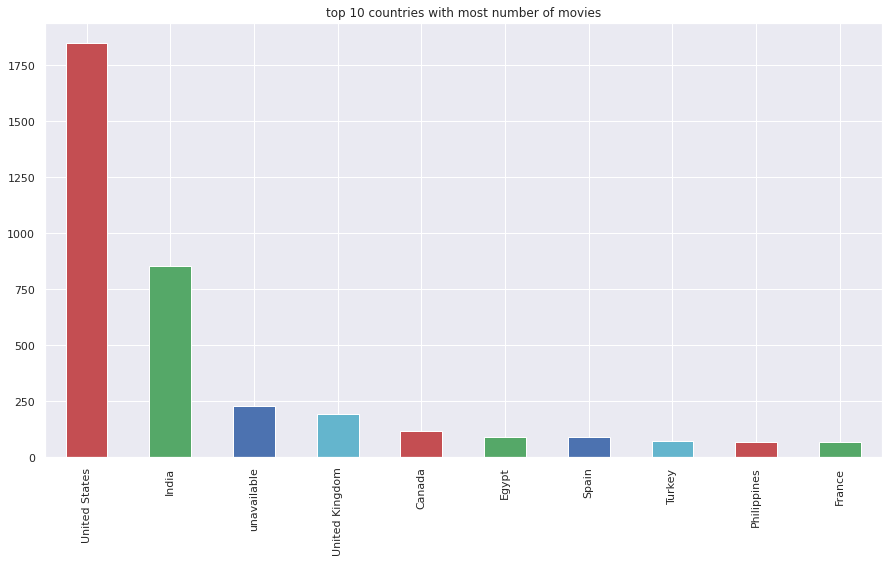

In [ ]:
# top 10 countries with most number of movies
movie_df=df[df["type"]=="Movie"]
plt.figure(figsize=(15,8))
sns.set()
movie_df.country.value_counts()[:10].plot( kind='bar', color=list('rgbc'),)
plt.title("top 10 countries with most number of movies")
plt.show()


USA ,India and The United kingdom  produces most number of movies  on Netflix

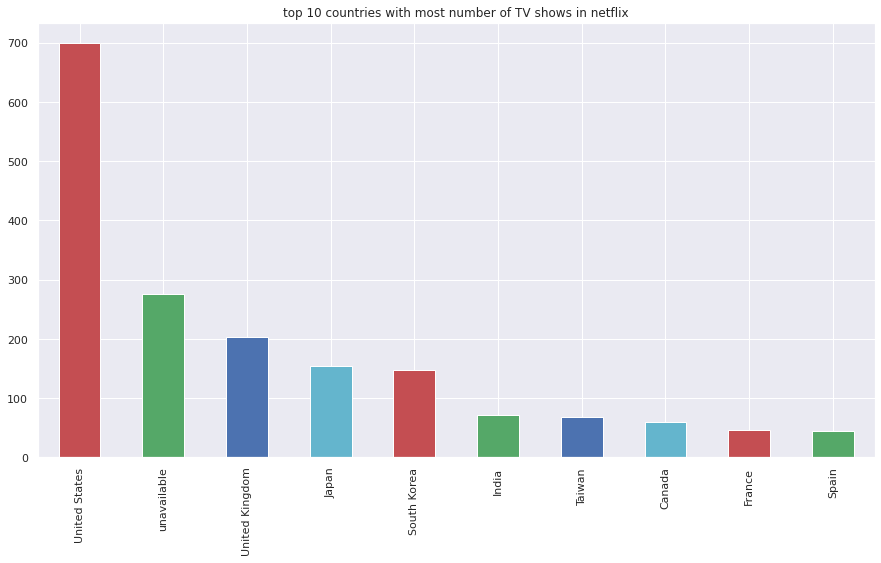

In [ ]:
# top 10 countries with most number of TV shows in netflix
tv_shows_df=df[df["type"]=="TV Show"]
plt.figure(figsize=(15,8))
sns.set()
tv_shows_df.country.value_counts()[:10].plot( kind='bar', color=list('rgbc'),)
plt.title("top 10 countries with most number of TV shows in netflix")
plt.show()



USA ,UK and Japan  produces most number of TV Shows on Netflix

In [ ]:
# no of tv shows and movies in each year
import plotly.graph_objects as go
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]
col = "year_added"
vc1 = d1[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values("year_added")
vc2 = d2["year_added"].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)
trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="orange"), )
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
data = [trace1, trace2]
fig_line = go.Figure(data)
fig_line.update_traces(hovertemplate=None)
fig_line.update_xaxes(showgrid=False)
fig_line.update_yaxes(showgrid=False)
large_title_format = 'Tv Show and Movies impact over the Year'
fig_line.update_layout(title=large_title_format , 
    height=400, margin=dict(t=130, b=0, l=70, r=40), 
    hovermode="x unified", xaxis_title=' ', 
    yaxis_title=" ", plot_bgcolor='#333', paper_bgcolor='#333', 
    title_font=dict(size=20, color='#8a8d93',
    family="Lato, sans-serif"),
    font=dict(color='#8a8d93'),
    legend=dict(orientation="h",
    yanchor="bottom",
    y=1.10,
    xanchor="left",
    x=0.8)) 

fig_line.show()


Netflix added most no of content in year 2018,2019,2020.

After the year 2019 covid came that badly affects Netflix for producing content.Although graph of TV Shows is increasing but Movies have exponential growth .


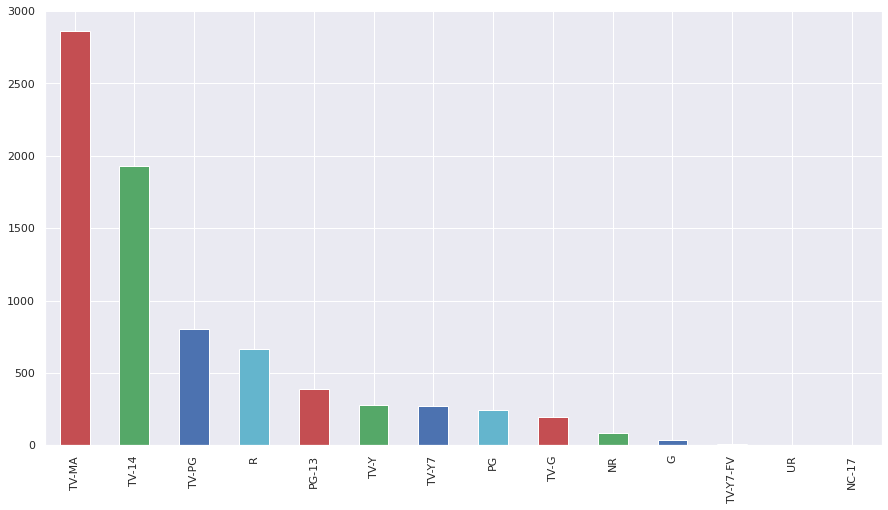

In [ ]:
# count of ratings
plt.figure(figsize=(15,8))
sns.set()
df.rating.value_counts().plot( kind='bar', color=list('rgbc'),)
plt.show()

TV-MA rated content is maximum in number in the Netflix.


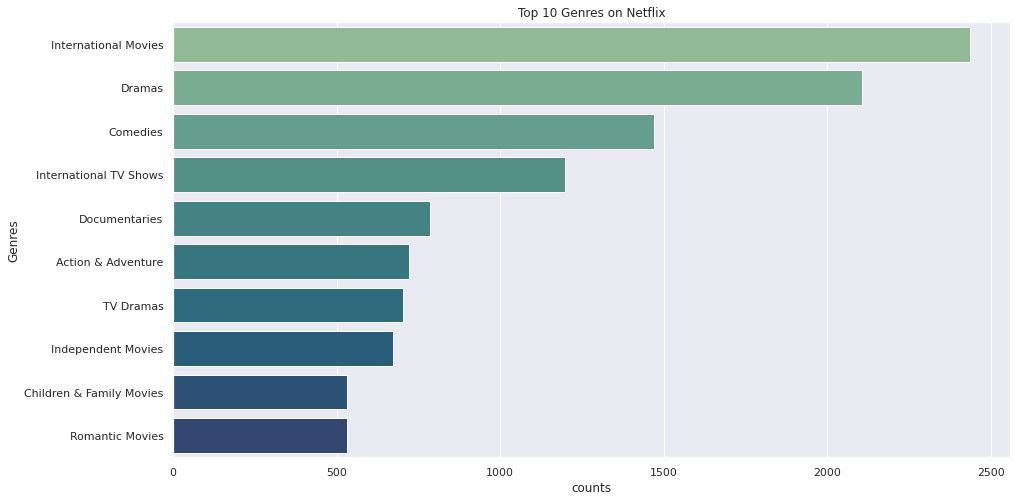

In [ ]:
# genres and there count
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(15,8))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10],palette = "crest")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('counts')
plt.ylabel('Genres')
plt.show()

International Movies,Dramas and Comedies are the top three genres on netflix.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


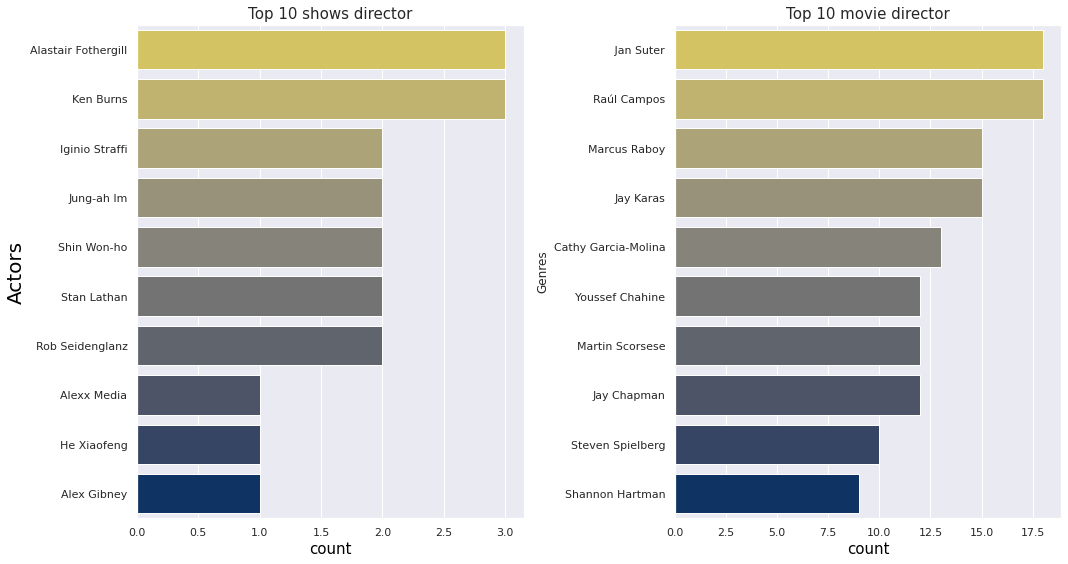

In [ ]:
# finding the top director who have worked in most content in movies and TV shows
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_director = tv_shows_df[tv_shows_df['director'] != 'unavailable']

movies_df  = df[df['type']== 'Movie']
movie_director = movies_df[movies_df['director'] != 'unavailable']




top_tv_shows_director =  tv_shows_director.director.str.split(',', expand= True).stack().reset_index(level =1, drop = True)
top_movie_director =  movie_director.director.str.split(',', expand= True).stack().reset_index(level =1, drop = True)



fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = top_tv_shows_director, order=top_tv_shows_director.value_counts().index[:10], ax= axes[0], palette ='cividis_r')
sns.countplot(y = top_movie_director, order=top_movie_director.value_counts().index[:10], ax= axes[1], palette = 'cividis_r')

axes[0].set_xlabel('count', fontsize = 15, c='black')
axes[1].set_xlabel('count', fontsize = 15, c='black')
axes[0].set_ylabel('Actors', fontsize = 20, c = 'black')
axes[0].set_title('Top 10 shows director', fontsize = 15)
axes[1].set_title('Top 10 movie director', fontsize = 15 )

plt.ylabel('Genres')
plt.tight_layout()
plt.show()
     


top director who have worked in most content in movies and TV shows

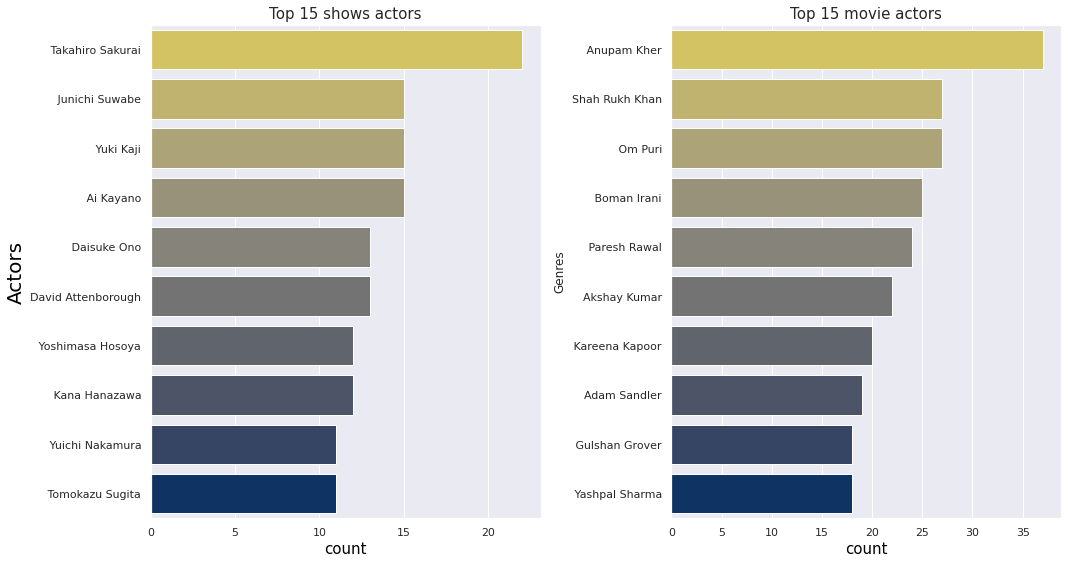

In [ ]:
# finding the top actors who have worked in most content in movies and TV shows
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_actors = tv_shows_df[tv_shows_df['cast'] != 'unavailable']

movies_df  = df[df['type']== 'Movie']
movie_actors = movies_df[movies_df['cast'] != 'unavailable']




top_shows_actors =  tv_shows_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)
top_movie_actors =  movie_actors.cast.str.split(',', expand= True).stack().reset_index(level =1, drop = True)



fig , axes = plt.subplots(1,2, figsize = (15,8))

sns.countplot(y = top_shows_actors, order=top_shows_actors.value_counts().index[:10], ax= axes[0], palette ='cividis_r')
sns.countplot(y = top_movie_actors, order=top_movie_actors.value_counts().index[:10], ax= axes[1], palette = 'cividis_r')

axes[0].set_xlabel('count', fontsize = 15, c='black')
axes[1].set_xlabel('count', fontsize = 15, c='black')
axes[0].set_ylabel('Actors', fontsize = 20, c = 'black')
axes[0].set_title('Top 15 shows actors', fontsize = 15)
axes[1].set_title('Top 15 movie actors', fontsize = 15 )

plt.ylabel('Genres')
plt.tight_layout()
plt.show()
     


top actors who have worked in most content in movies and TV shows

**FEATURE ENGINEERING AND TEXT CLEANING**

In [ ]:
# combining text based feature in one column
df["combined_text_features"] = df['listed_in'].astype(str) + " " + df['description'].astype(str) + " " + df['type'].astype(str) + " "  + df['country'].astype(str) + " " + df['cast'].astype(str) + " " + df['rating'].astype(str)
   

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,combined_text_features
0,s1,TV Show,3%,unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,"Dramas, International Movies After a devastati..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,"Horror Movies, International Movies When an ar..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,Dramas A brilliant group of students become ca...


In [ ]:
df["combined_text_features"][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV Show Brazil João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi TV-MA'

##**NLP**##

**STEMMING**

In [ ]:
from nltk.stem import PorterStemmer

import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

stemmer = PorterStemmer()
# Cleaning the text
STOPWORDS = set(stopwords.words('english'))

def clean_text(inp_str):

    # Lowercase text
    inp_str = inp_str.lower() 

    # Replace  symbols by space in text
    inp_str = inp_str.replace('.', '')
    inp_str = inp_str.replace("'", '')
    

    # Remove the unavaible values.
    
    inp_str = inp_str.replace('unavailable', '') 
    

    # Remove stopwords from text
    inp_str = ' '.join(word for word in inp_str.split() if word not in STOPWORDS) 
    
    # Remove any words composed of less than 2 or more than 21 letters
    inp_str = ' '.join(word for word in inp_str.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    inp_str = ' '.join([stemmer.stem(word) for word in inp_str.split()])
    
    return inp_str

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# applying function in our feature
df["combined_text_features"] = df["combined_text_features"].apply(clean_text)
df["combined_text_features"]

0       intern tv shows, tv dramas, tv sci-fi fantasi ...
1       dramas, intern movi devast earthquak hit mexic...
2       horror movies, intern movi armi recruit found ...
3       action adventure, independ movies, sci-fi fant...
4       drama brilliant group student becom card-count...
                              ...                        
7782    dramas, intern movi lebanon civil war depriv z...
7783    dramas, intern movies, music music scrappi poo...
7784    documentaries, intern movies, music music docu...
7785    intern tv shows, realiti tv dessert wizard adr...
7786    documentaries, music music documentari delv my...
Name: combined_text_features, Length: 7770, dtype: object

##**VECTORIZATION**

**TF-IDF**

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(df["combined_text_features"])

pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names()).head(5)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000   10  10 year  100   11  11 year   12  12 year        13   14   15  \
0  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0  0.000000  0.0  0.0   
1  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0  0.000000  0.0  0.0   
2  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0  0.000000  0.0  0.0   
3  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0  0.113582  0.0  0.0   
4  0.0  0.0      0.0  0.0  0.0      0.0  0.0      0.0  0.119564  0.0  0.0   

   15 year   16   17   18  1950  1960  1970  1980  1990  19th  19th centuri  \
0      0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0           0.0   
1      0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0           0.0   
2      0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0           0.0   
3      0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0           0.0   
4      0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0           0.0   

    20  20 year   24   25   30  30 year   40   50  50 year   60  aamir  \
0  0.0      0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0    0.0   
1  0.0      0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0    0.0   
2  0.0      0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0    0.0   
3  0.0      0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0    0.0   
4  0.0      0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0  0.0    0.0   

   aamir khan     aaron  abandon  abbi  abbott  abdel  abdel aziz  abduct  \
0         0.0  0.000000      0.0   0.0     0.0    0.0         0.0     0.0   
1         0.0  0.000000      0.0   0.0     0.0    0.0         0.0     0.0   
2         0.0  0.000000      0.0   0.0     0.0    0.0         0.0     0.0   
3         0.0  0.000000      0.0   0.0     0.0    0.0         0.0     0.0   
4         0.0  0.165514      0.0   0.0     0.0    0.0         0.0     0.0   

   abdullah  abel  abhay  abhay deol  abhishek  abhishek bachchan  abigail  \
0       0.0   0.0    0.0         0.0       0.0                0.0      0.0   
1       0.0   0.0    0.0         0.0       0.0                0.0      0.0   
2       0.0   0.0    0.0         0.0       0.0                0.0      0.0   
3       0.0   0.0    0.0         0.0       0.0                0.0      0.0   
4       0.0   0.0    0.0         0.0       0.0                0.0      0.0   

   abil  aboard  abou  abraham  absurd  abus  academi  accept  access  accid  \
0   0.0     0.0   0.0      0.0     0.0   0.0      0.0     0.0     0.0    0.0   
1   0.0     0.0   0.0      0.0     0.0   0.0      0.0     0.0     0.0    0.0   
2   0.0     0.0   0.0      0.0     0.0   0.0      0.0     0.0     0.0    0.0   
3   0.0     0.0   0.0      0.0     0.0   0.0      0.0     0.0     0.0    0.0   
4   0.0     0.0   0.0      0.0     0.0   0.0      0.0     0.0     0.0    0.0   

   accident  acclaim  account  accus  achiev  acosta  act  action  \
0       0.0      0.0      0.0    0.0     0.0     0.0  0.0  0.0000   
1       0.0      0.0      0.0    0.0     0.0     0.0  0.0  0.0000   
2       0.0      0.0      0.0    0.0     0.0     0.0  0.0  0.0000   
3       0.0      0.0      0.0    0.0     0.0     0.0  0.0  0.0905   
4       0.0      0.0      0.0    0.0     0.0     0.0  0.0  0.0000   

   action adventur  action adventure  activ  activist  actor  actress  actual  \
0              0.0          0.000000    0.0       0.0    0.0      0.0     0.0   
1              0.0          0.000000    0.0       0.0    0.0      0.0     0.0   
2              0.0          0.000000    0.0       0.0    0.0      0.0     0.0   
3              0.0          0.096538    0.0       0.0    0.0      0.0     0.0   
4              0.0          0.000000    0.0       0.0    0.0      0.0     0.0   

    ad  ada  adam  adam sandler  adam scott  adams  adapt  addict  adel  \
0  0.0  0.0   0.0           0.0         0.0    0.0    0.0     0.0   0.0   
1  0.0  0.0   0.0           0.0         0.0    0.0    0.0     0.0   0.0   
2  0.0  0.0   0.0           0.0         0.0    0.0    0.0     0.0   0.0   
3  0.

In [ ]:
#Applying PCA for dimenstionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
y= pca.fit_transform(X_vc.toarray())


In [ ]:
# print
y


array([[ 0.13333397, -0.01945301],
       [-0.04024985, -0.06601975],
       [-0.05375834, -0.04936359],
       ...,
       [-0.06072651, -0.05290386],
       [ 0.16719034,  0.00224074],
       [-0.071224  ,  0.14876302]])

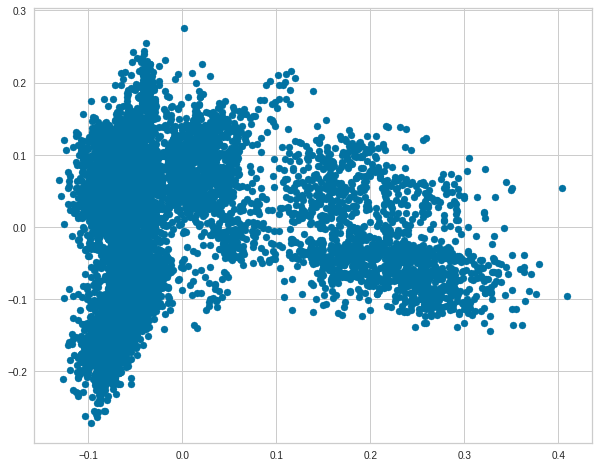

In [ ]:
# visualization after PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(y[:, 0], y[:, 1])
plt.show()

**TEXT BASED CLUSTERING**

Text(0.5, 1.0, 'Elbow Curve')

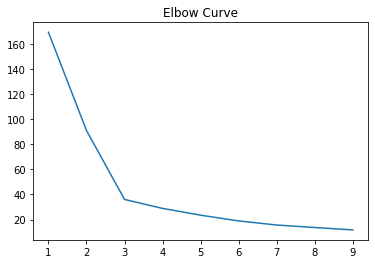

In [ ]:
#Performing the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):

    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title("Elbow Curve")

In [ ]:
#finding the optimal number of clusters through silhouette_score 
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(y)
    preds = clusterer.predict(y)
    centers = clusterer.cluster_centers_

    score = silhouette_score (y, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.537206749658206)
For n_clusters = 3, silhouette score is 0.5831186999469646)
For n_clusters = 4, silhouette score is 0.493150407857069)
For n_clusters = 5, silhouette score is 0.44540375627432727)
For n_clusters = 6, silhouette score is 0.4178684800195025)
For n_clusters = 7, silhouette score is 0.40955245530568035)
For n_clusters = 8, silhouette score is 0.4199278710851825)
For n_clusters = 9, silhouette score is 0.41306604640306077)


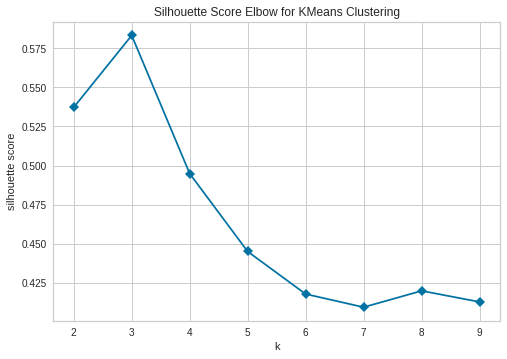

In [ ]:
# Visulizing Silhouette score
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=range_n_clusters, metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(y)
visualizer.show()

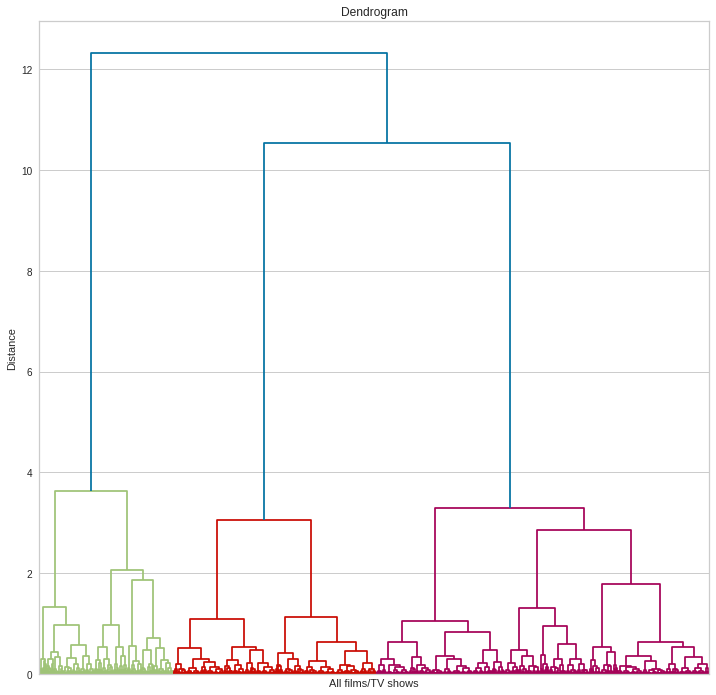

In [ ]:
#finding the optimal number of clusters dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
distances_linkage = linkage(y,
                            method = 'ward', 
                            metric = 'euclidean')
                      
plt.figure(figsize=(12, 12))

plt.title('Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')

dendrogram(
    distances_linkage,
    no_labels = True
)

plt.show()

from above three technique it is clearly seen that no of cluster should be 3

**KMeans CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(y)
y_kmeans = kmeans.predict(y)

In [ ]:
# predictions
y_kmeans

array([2, 1, 1, ..., 1, 2, 0], dtype=int32)

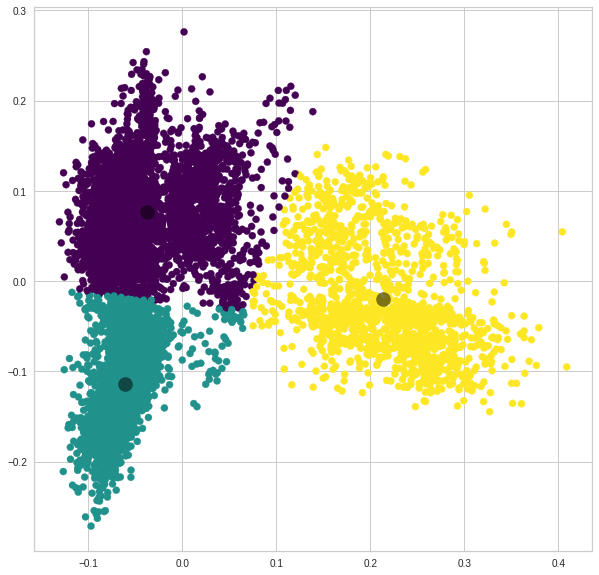

In [ ]:
# visualising clusters
plt.figure(figsize=(10, 10))
plt.scatter(y[:, 0], y[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
df['Cluster']=y_kmeans

In [ ]:
# segregating clusters
cluster0=df.loc[df['Cluster']==0,]
cluster1=df.loc[df['Cluster']==1,]
cluster2=df.loc[df['Cluster']==2,]


In [ ]:
# records in cluster 0
cluster0

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,combined_text_features,Cluster
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,"action adventure, independ movies, sci-fi fant...",0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,drama brilliant group student becom card-count...,0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,2019,"drama one high school student attack him, dedi...",0
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017,"dramas, thriller farmer pen confess admit wife...",0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020,"independ movies, sci-fi fantasy, thriller stra...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7774,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,"cult movies, dramas, thriller polit cartoonist...",0
7775,s7776,TV Show,Zoids Wild,unavailable,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020,"anim series, kid tv quest freedom legendari tr...",0
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,"comedies, horror movi look surviv world taken ...",0
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,"children famili movies, comedi drag civilian l...",0


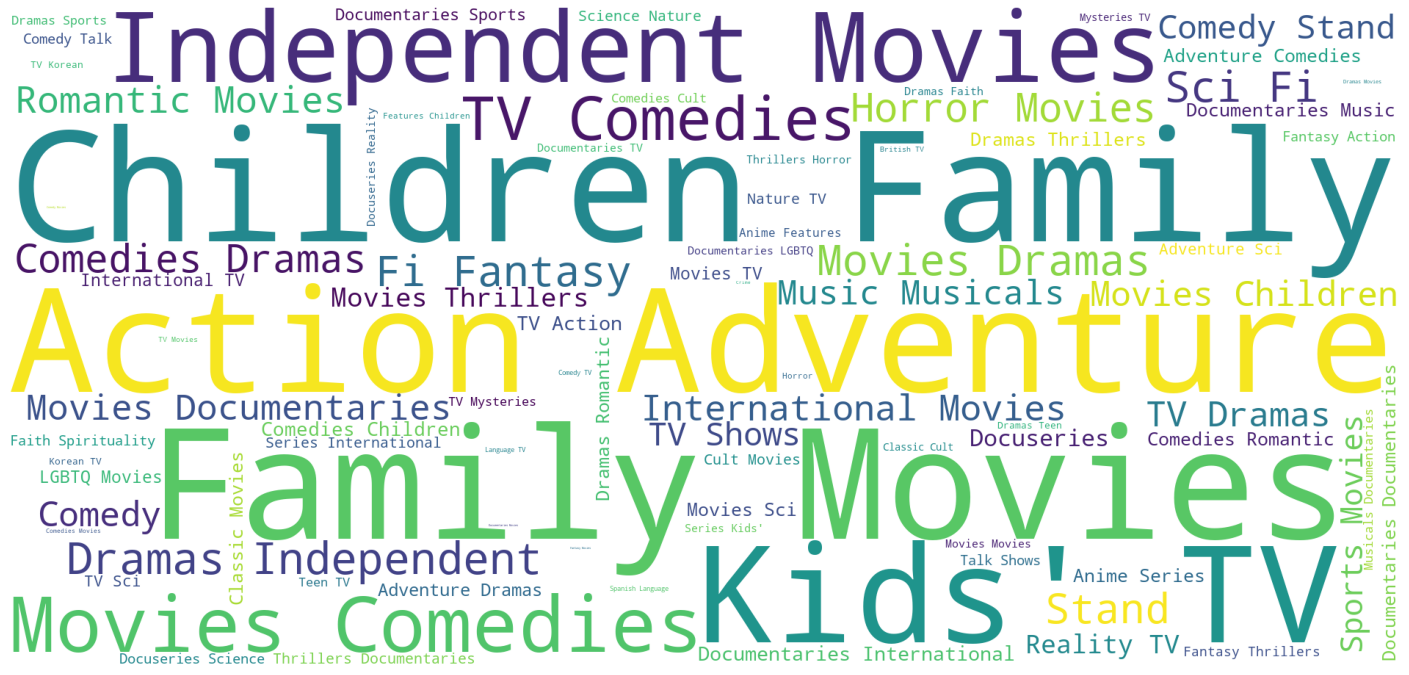

In [ ]:
# genres in cluster0
plt.subplots(figsize=(25,15))
wordcloud = WordCloud( background_color='white',width=1900,height=900 ).generate(" ".join(cluster0.listed_in))
plt.imshow(wordcloud)                  
plt.axis('off')
plt.savefig('country.png')
plt.show()

Cluster 0 is for those audience who loves to watch family and kids related content

In [ ]:
# records in cluster1
cluster1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,combined_text_features,Cluster
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,"dramas, intern movi devast earthquak hit mexic...",1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,"horror movies, intern movi armi recruit found ...",1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,"horror movies, intern movi aw accident, coupl ...",1
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019,"horror movies, intern movi doctor goe missing,...",1
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017,"horror movies, intern movies, thriller archite...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018,"children famili movies, drama cruel uncl aband...",1
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,"dramas, independ movies, intern movi drug deal...",1
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,"dramas, intern movi lebanon civil war depriv z...",1
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,"dramas, intern movies, music music scrappi poo...",1


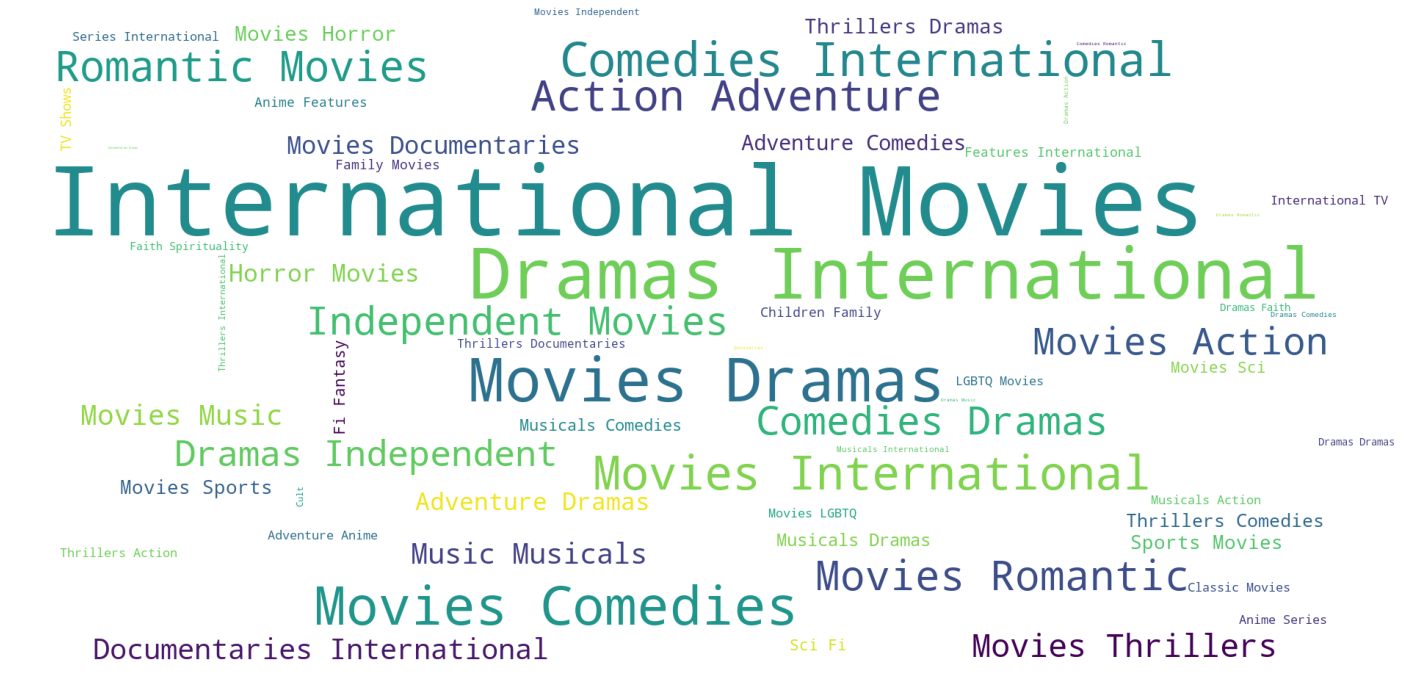

In [ ]:
# genres in cluster1
plt.subplots(figsize=(25,15))
wordcloud = WordCloud( background_color='white',width=1900,height=900 ).generate(" ".join(cluster1.listed_in))
plt.imshow(wordcloud)                  
plt.axis('off')
plt.savefig('country.png')
plt.show()

Cluster 1 is for those audience who loves to watch international content.

In [ ]:
# records in cluster 2
cluster2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,combined_text_features,Cluster
0,s1,TV Show,3%,unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,"intern tv shows, tv dramas, tv sci-fi fantasi ...",2
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,"intern tv shows, tv dramas, tv mysteri genet p...",2
11,s12,TV Show,1983,unavailable,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,"crime tv shows, intern tv shows, tv drama dark...",2
12,s13,TV Show,1994,Diego Enrique Osorno,unavailable,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,"crime tv shows, docuseries, intern tv show arc...",2
16,s17,TV Show,Feb-09,unavailable,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",unavailable,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,"intern tv shows, tv drama psycholog professor ...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7753,s7754,TV Show,Yunus Emre,unavailable,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017,"intern tv shows, tv drama mongol invasions, yu...",2
7767,s7768,TV Show,Zindagi Gulzar Hai,unavailable,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,"intern tv shows, romant tv shows, tv drama str...",2
7777,s7778,TV Show,Zombie Dumb,unavailable,unavailable,unavailable,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,"kid tv, korean tv shows, tv comedi live alon s...",2
7779,s7780,TV Show,Zona Rosa,unavailable,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,2019,"intern tv shows, spanish-languag tv shows, sta...",2


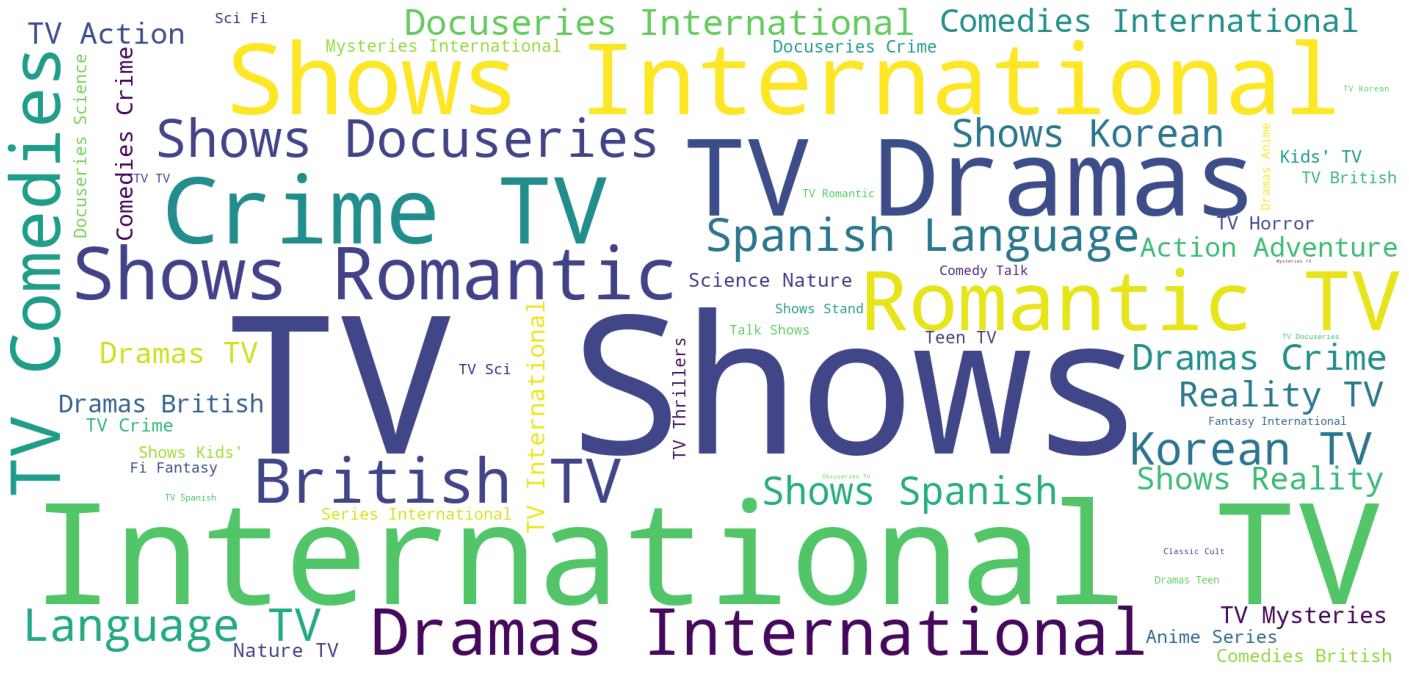

In [ ]:
# genres in cluster2
plt.subplots(figsize=(25,15))
wordcloud = WordCloud( background_color='white',width=1900,height=900 ).generate(" ".join(cluster2.listed_in))
plt.imshow(wordcloud)                  
plt.axis('off')
plt.savefig('country.png')
plt.show()

Cluster 2 is for those audience who loves to watch TV shows .

#**RECOMMENDATION**

In [ ]:
# recommendation system
from sklearn.metrics.pairwise import cosine_similarity

 #compute the cosine similarity matrix   
cosine_sim = cosine_similarity(X_vc)
     
# list of all programme(movies and TV Shows)
programme_list=df['title'].to_list()
     
# function to get recommended moveis
def recommend(title, cosine_similarity=cosine_sim):
    #get index of the matching title
    index = programme_list.index(title)

    #get the similarity score of the similar titles
    sim_score = list(enumerate(cosine_sim[index]))

    #sort the movies based on the similarity score
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    
    # index of recomended movie
    recommend_index = [i[0] for i in sim_score]

    # recommended movie and TV Shows

    +
    rec_movie = df['title'].iloc[recommend_index]

    # recommended score
    rec_score = [round(i[1],2) for i in sim_score]

    #record data frame 
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])

    return rec_table

In [ ]:
# content recommending
recommend("3 Idiots")

,Recommend programme,Similarity(0-1)
0,PK,0.44
1,Ek Main Aur Ekk Tu,0.33
2,Dil,0.32
3,Talaash,0.30
4,Taare Zameen Par,0.29
5,Rang De Basanti,0.28
6,Madness in the Desert,0.28
7,Made in China,0.26
8,Dil Chahta Hai,0.26
9,The Legend of Michael Mishra,0.25


#**CONCLUSION**


*   Netflix has  around 69%  movies and 31% TV shows.

*   USA ,India and The United kingdom are top three producers country in Netflix 

*   TV-MA rated content is maximum in number in the Netflix.

*   Netflix  added most no of content in year 2018,2019,2020.

 
*   After the year 2019 covid came that badly affects Netflix for producing content.Although graph of TV Shows is increasing but Movies have exponential growth .



*   International Movies,Dramas and Comedies are the top three genres on netflix.

*   Text cleaning and vectorization was done on the combined features of the dataset which includes origin country, leading cast member, rating type, content type and description for clustering analysis.

*   Principal component analysis was performed inorder to reduce the higher dimensionality.







*   Optimal number of clusters has been  found out to be 3 using Elbow Curve,silhouette score and dendrogram.



*   Then K_means Clustering is implemented .

*   Cluster 0 is for those audience who loves to watch family and kids related content
*   Cluster 1 is for those audience who loves to watch international content.

*   Cluster 2 is for those audience who loves to watch TV shows .






*   At last we make a recommrndation system ,that can help audience to find there Favourite content.

